In [ ]:
#Importing Lib

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Importing Data

In [2]:
df= pd.read_csv("insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [7]:
df.shape

(1338, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [10]:
df.describe().columns

Index(['age', 'bmi', 'children', 'expenses'], dtype='object')

In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [14]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<AxesSubplot:>

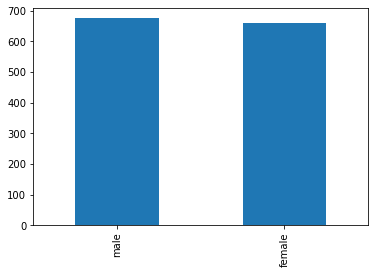

In [15]:
df['sex'].value_counts().sort_index(ascending=False).plot(kind='bar')

In [17]:
factors=['age','sex','bmi','children','expenses']
df.groupby('sex')[factors].mean()

,age,bmi,children,expenses
sex,,,,
female,39.503021,30.379758,1.074018,12569.578897
male,38.917160,30.945266,1.115385,13956.751420


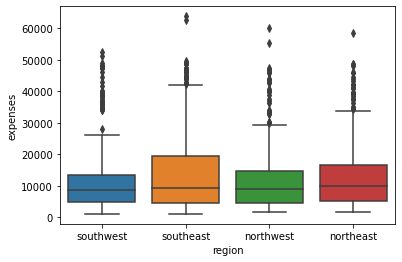

In [24]:
sns.boxplot(x='region',y='expenses', data=df);

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [27]:
df.sex=le.fit_transform(df.sex)
df.smoker=le.fit_transform(df.smoker)
df.region=le.fit_transform(df.region)

<AxesSubplot:xlabel='age', ylabel='smoker'>

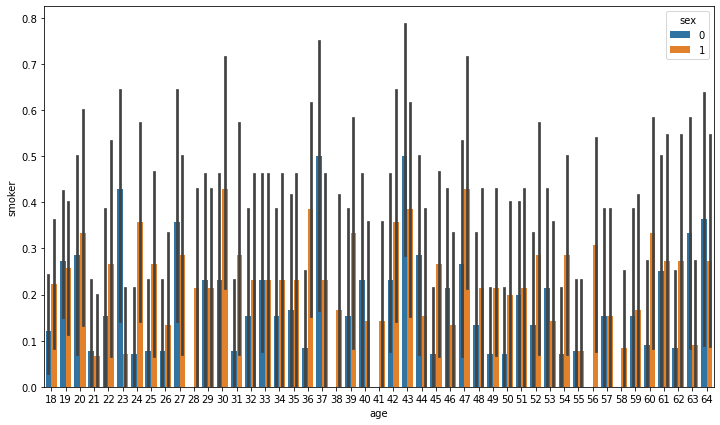

In [29]:
plt.figure(figsize=(12,7))
sns.barplot(x=df.age, y=df.smoker,hue= df.sex)

<AxesSubplot:xlabel='sex', ylabel='expenses'>

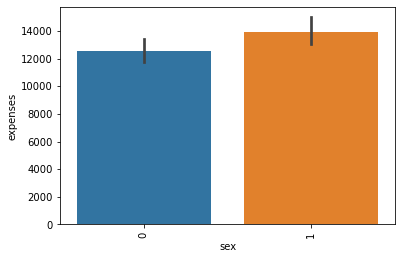

In [32]:
plt.xticks(rotation=90)
sns.barplot(x=df.sex, y=df.expenses)

<AxesSubplot:xlabel='smoker', ylabel='expenses'>

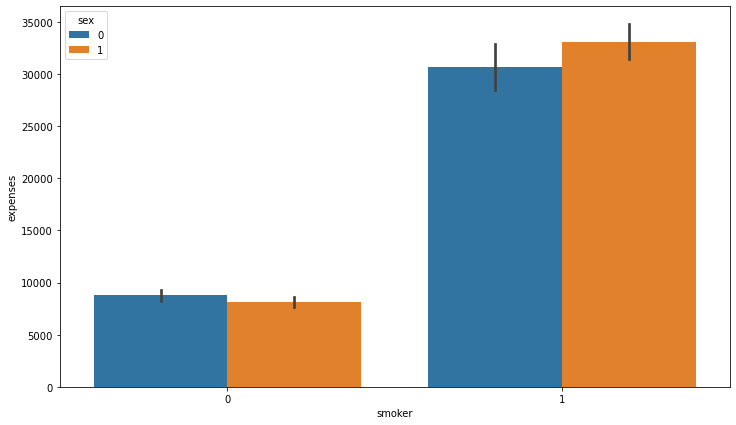

In [34]:
plt.figure(figsize = (12,7))
sns.barplot(x=df.smoker, y=df.expenses,hue=df.sex)

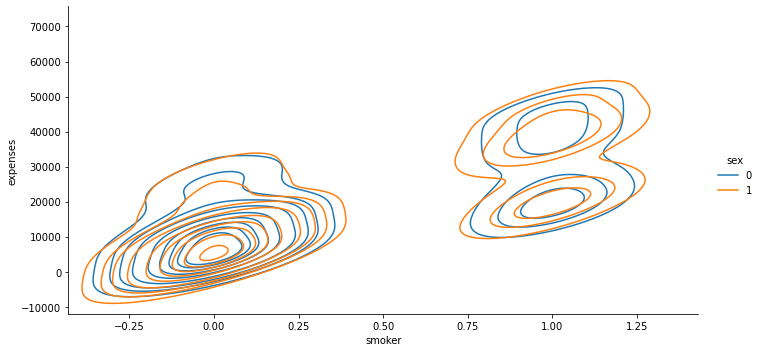

In [38]:
sns.displot(kind='kde',x='smoker',y='expenses', hue='sex',data=df,aspect=2);

<AxesSubplot:xlabel='bmi', ylabel='smoker'>

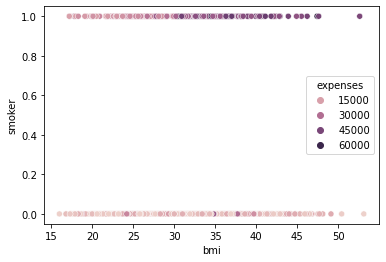

In [40]:
sns.scatterplot(x='bmi',y='smoker',hue='expenses',data=df)

In [43]:
df_factors=df[['age','sex','bmi','children','smoker','region','expenses']]

               age       sex       bmi  children    smoker    region  expenses
age       1.000000 -0.020856  0.109341  0.042469 -0.025019  0.002127  0.299008
sex      -0.020856  1.000000  0.046380  0.017163  0.076185  0.004588  0.057292
bmi       0.109341  0.046380  1.000000  0.012645  0.003968  0.157439  0.198576
children  0.042469  0.017163  0.012645  1.000000  0.007673  0.016569  0.067998
smoker   -0.025019  0.076185  0.003968  0.007673  1.000000 -0.002181  0.787251
region    0.002127  0.004588  0.157439  0.016569 -0.002181  1.000000 -0.006208
expenses  0.299008  0.057292  0.198576  0.067998  0.787251 -0.006208  1.000000


<AxesSubplot:>

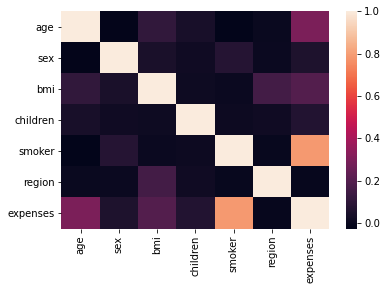

In [46]:
print(df_factors.corr())
sns.heatmap(df_factors.corr())

In [47]:
x=df.drop(['expenses'],axis=1)

In [49]:
y=df.expenses

In [50]:
x.shape

(1338, 6)

In [51]:
y.shape

(1338,)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [53]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [54]:
y_pred= model.predict(X_test)

In [55]:
print("Training Accuracy: ", model.score(X_train,y_train))
print("Testing Accuracy: ", model.score(X_test, y_test))

Training Accuracy:  0.751021128782926
Testing Accuracy:  0.7468054150993881


In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [58]:
model1=DecisionTreeRegressor()
model1.fit(X_train,y_train)

DecisionTreeRegressor()

In [59]:
y_pred = model.predict(X_test)

In [61]:
print("Training Accuracy:",model1.score(X_train,y_train))
print("Testing Accuracy:",model1.score(X_test,y_test))

Training Accuracy: 0.9983239129330218
Testing Accuracy: 0.7197240860052188


In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.2)

In [67]:
model2=DecisionTreeRegressor()
model2.fit(X_train,y_train)

DecisionTreeRegressor()

In [68]:
y_pred=model2.predict(X_test)

In [72]:
print("Training Accuracy: ", model2.score(X_train,y_train))
print("Testing Accuracy: ",model2.score(X_test,y_test))

Training Accuracy:  0.6638926474465168
Testing Accuracy:  1.0
